## 作業

目標: 建立一深度學習模型預測客戶是否流失

- 問題五: 請繪製ROC Curve, 並求出 AUC
- 問題六: 請比較 ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 各模型的 AUC 與 ROC Curve

### 讀取資料

In [13]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamedl/master/Data/Churn_Modelling.csv', header = 0 )
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 資料前處理

In [14]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df = df.iloc[:,3:]

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
geo = pandas.get_dummies(df['Geography']).drop('France', axis= 1)

In [18]:
gender = df['Gender'].replace({'Male':1, 'Female':0})

In [22]:
df2 = pandas.concat([geo, gender, df.drop(['Geography', 'Gender'], axis=1)], axis = 1)
df2.head()

,Germany,Spain,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,850,43,2,125510.82,1,1,1,79084.10,0


### 區分 X,y

In [23]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

### 建立訓練與測試資料集

In [26]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state = 42)

### 標準化

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [28]:
train_X.shape

(6700, 11)

### 建立 ANN 模型

In [33]:
# 11 -> 5 -> 5->  1
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout

model = models.Sequential()
model.add(Dense(5 , activation= 'relu', input_shape=(11,) ))
model.add(Dropout(rate = 0.1))
model.add(Dense(5 , activation= 'relu' ))
model.add(Dropout(rate = 0.1))
model.add(Dense(1 , activation= 'sigmoid' ))


model.compile(optimizer='adam',
       loss = 'binary_crossentropy',
       metrics = ['accuracy'])

### 訓練模型

In [ ]:
history  = model.fit(train_X, train_y,
    epochs = 100,
    verbose = 1,
    validation_data = (test_X, test_y))

### 計算準確度與 Confusion Matrix

In [35]:
model.evaluate(test_X, test_y)

104/104 [==============================] - 0s 1ms/step - loss: 0.3391 - accuracy: 0.8655


[0.33910703659057617, 0.8654545545578003]

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix
pred_y = (model.predict(test_X) > 0.3).flatten().astype(int)
accuracy_score(test_y, pred_y)

0.850909090909091

In [47]:
confusion_matrix(test_y, pred_y)

array([[2424,  233],
       [ 259,  384]])

In [48]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2657
           1       0.62      0.60      0.61       643

    accuracy                           0.85      3300
   macro avg       0.76      0.75      0.76      3300
weighted avg       0.85      0.85      0.85      3300



### 繪製 ROC Curve 並求出 AUC

In [51]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(test_y, model(test_X).numpy())

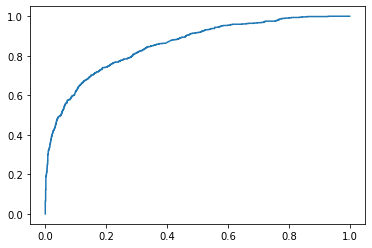

In [52]:
from matplotlib import pyplot as plt
plt.plot(fpr, tpr)

In [53]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8560040645005329

### 比較 ANN, SVM, Gradient Boosting, Random Forest, Logist Regression, Decision Tree 各模型的 AUC 與 ROC Curve

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability = True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

clf5 = GradientBoostingClassifier()
clf5.fit(train_X, train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

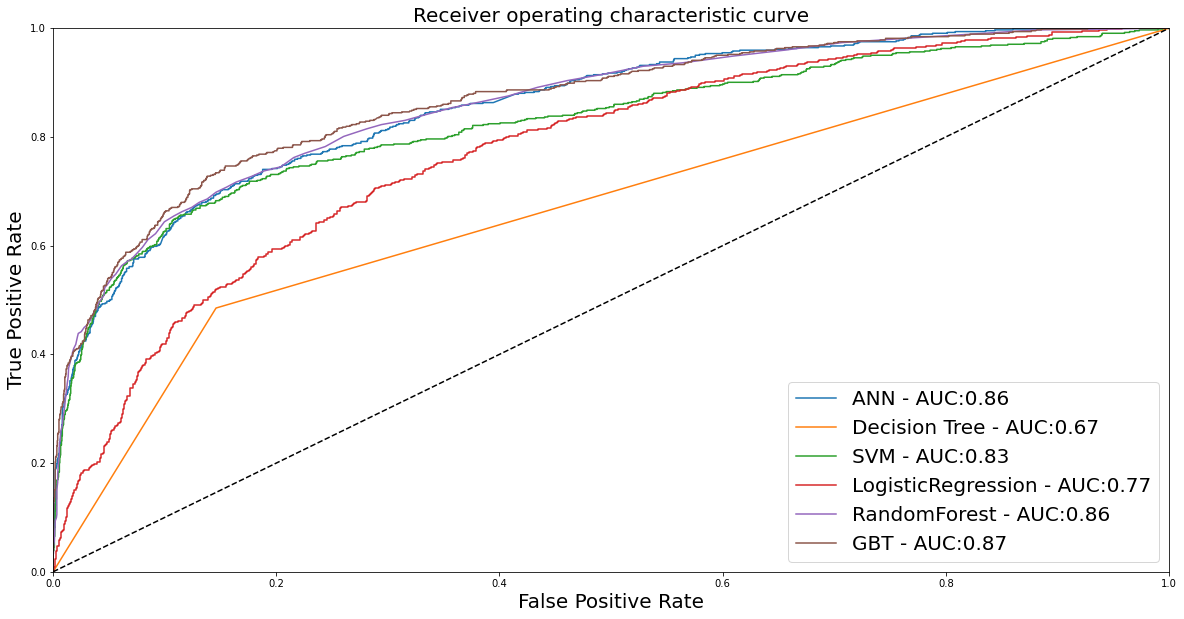

In [55]:
plt.figure(figsize= [20,10])

for clf, title in zip([model,clf1,clf2,clf3,clf4,clf5], 
             ['ANN','Decision Tree','SVM','LogisticRegression','RandomForest','GBT']):
  if title != 'ANN':
    probas_ = clf.predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
  else:
    y_pred = clf(test_X).numpy()
    fpr, tpr, thresholds = roc_curve(test_y, y_pred)
  plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic curve', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

In [ ]:
Add more data
Use data augmentation
Use architectures that generalize well
Add regularization (mostly dropout, L1/L2 regularization are also possible)
Reduce architecture complexity.